
📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       854

    accuracy                           1.00      1754
   macro avg       1.00      1.00      1.00      1754
weighted avg       1.00      1.00      1.00      1754


🧱 Confusion Matrix:


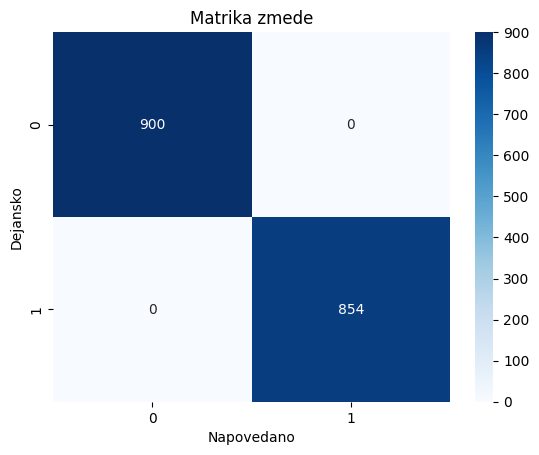

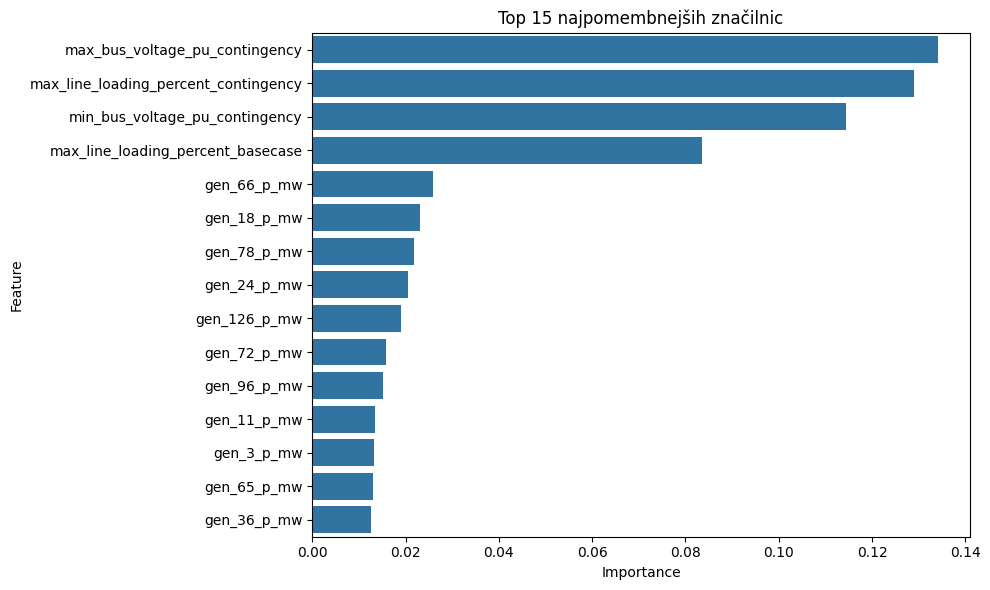


✅ Model shranjen kot: ../models/random_forest_model_2025-04-03_14-24-49.pkl
📄 Metrike shranjene kot: ../models/model_metrics_2025-04-03_14-24-49.json


In [3]:
# ----------------------------
# train_classifier_final.ipynb (Python skripta verzija)
# ----------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import json
from datetime import datetime

# ----------------------------
# 1. Branje podatkov
# ----------------------------
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv").squeeze()
y_test = pd.read_csv("../data/y_test.csv").squeeze()

# ----------------------------
# 2. Treniranje modela
# ----------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ----------------------------
# 3. Napoved in evalvacija
# ----------------------------
y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\n🧱 Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Napovedano")
plt.ylabel("Dejansko")
plt.title("Matrika zmede")
plt.show()

# ----------------------------
# 4. Pomembnost značilnic
# ----------------------------
importances = model.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title("Top 15 najpomembnejših značilnic")
plt.tight_layout()
plt.show()

# ----------------------------
# 5. Shrani model in metrike
# ----------------------------
now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_path = f"../models/random_forest_model_{now}.pkl"
joblib.dump(model, model_path)

# Shrani metrike kot JSON
metrics = {
    "accuracy": accuracy,
    "classification_report": report,
    "timestamp": now
}

with open(f"../models/model_metrics_{now}.json", "w") as f:
    json.dump(metrics, f, indent=4)

print(f"\n✅ Model shranjen kot: {model_path}")
print(f"📄 Metrike shranjene kot: ../models/model_metrics_{now}.json")
